## Task 1: Machine Learning Pipeline (60%)

### Data importing and analysis

In this section i am importing my csv file and viewing the data.

In [1]:
#importing pandas library
import pandas as pd 
#reading csv file
MRdataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv')
print(MRdataset.head(5))
#number of observations
print(MRdataset.shape[0])
#number of attributes
print(MRdataset.shape[1])
print(MRdataset.columns)
#number of observations for each class
print(MRdataset.RiskLevel.value_counts())
#print(MRdataset.info())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
1014
7
Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')
low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64


In [2]:
#statistical analysis of data
MRdataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [3]:
#Here i am checking for any null values in the dataset as a part of my data cleaning process.
MRdataset.isnull().sum() 
#no null values

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

### Exploratory Data Analysis

This stage involves visulation of the data. This allows for better interpretation and allows me to better understand each attribute and its effect on the class value.

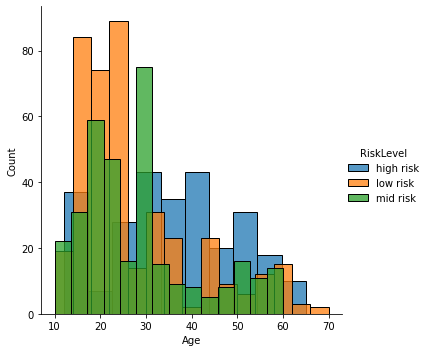

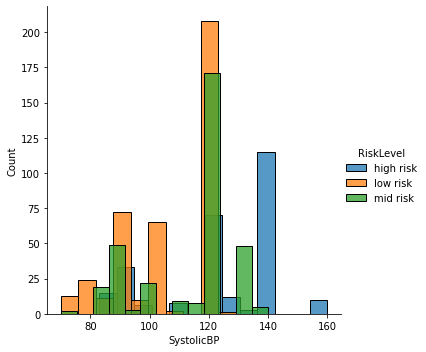

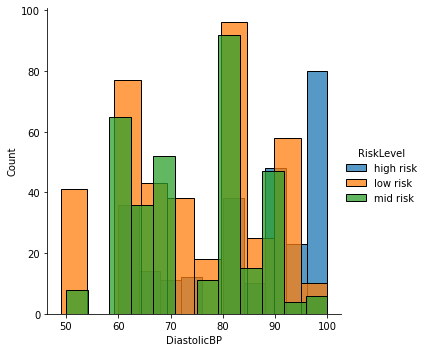

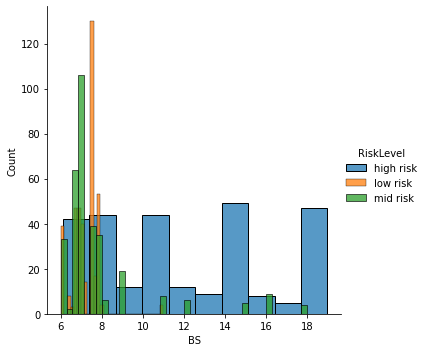

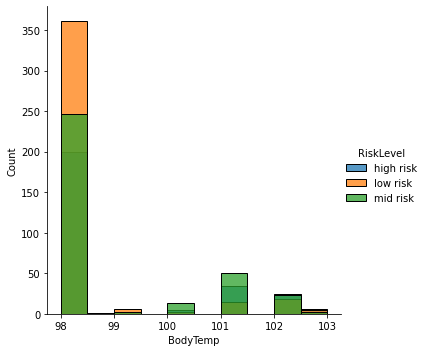

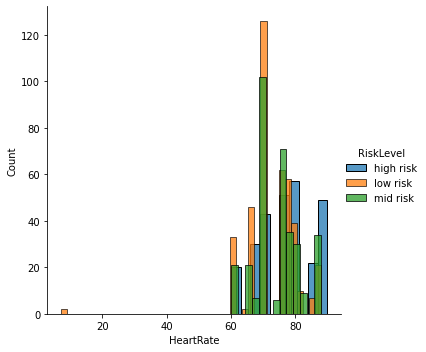

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
for ojha, feature in enumerate(list(MRdataset.columns)[:-1]):
    fg = sns.FacetGrid(MRdataset, hue='RiskLevel', height=5)
    fg.map(sns.histplot, feature).add_legend()
    plt.show()
    
#Code Adapted from: [https://medium.com/@sulavojha11/exploratory-data-analysis-on-iris-dataset-84832e519040]

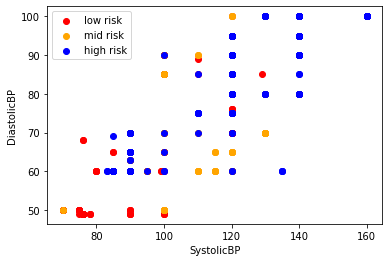

In [5]:
colors = ['red', 'orange', 'blue']
RiskLevel = ['low risk', 'mid risk', 'high risk']

for i in range(3):
        x=MRdataset[MRdataset['RiskLevel'] == RiskLevel[i]]
        plt.scatter(x["SystolicBP"], x["DiastolicBP"], c = colors[i])
        
plt.xlabel("SystolicBP")
plt.ylabel("DiastolicBP")
plt.legend(RiskLevel)

#This plot allows me to explore the relationship between the Diastolic BP 
#and the Systolic BP
#The higher the BP's the higher risk level during pregnancy.

(array([  2.,   0.,   0.,   0.,   0.,   0.,  79., 372., 409., 152.]),
 array([ 7. , 15.3, 23.6, 31.9, 40.2, 48.5, 56.8, 65.1, 73.4, 81.7, 90. ]),
 <BarContainer object of 10 artists>)

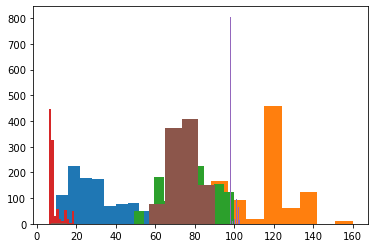

In [6]:
plt.hist([MRdataset["Age"]])
plt.hist([MRdataset["SystolicBP"]])
plt.hist([MRdataset["DiastolicBP"]])
plt.hist([MRdataset["BS"]])
plt.hist([MRdataset["BodyTemp"]])
plt.hist([MRdataset["HeartRate"]])
#This section plots histograms for each attribute.
#Here i can see the distribution which allows a better understanding in which approach to take in this task.

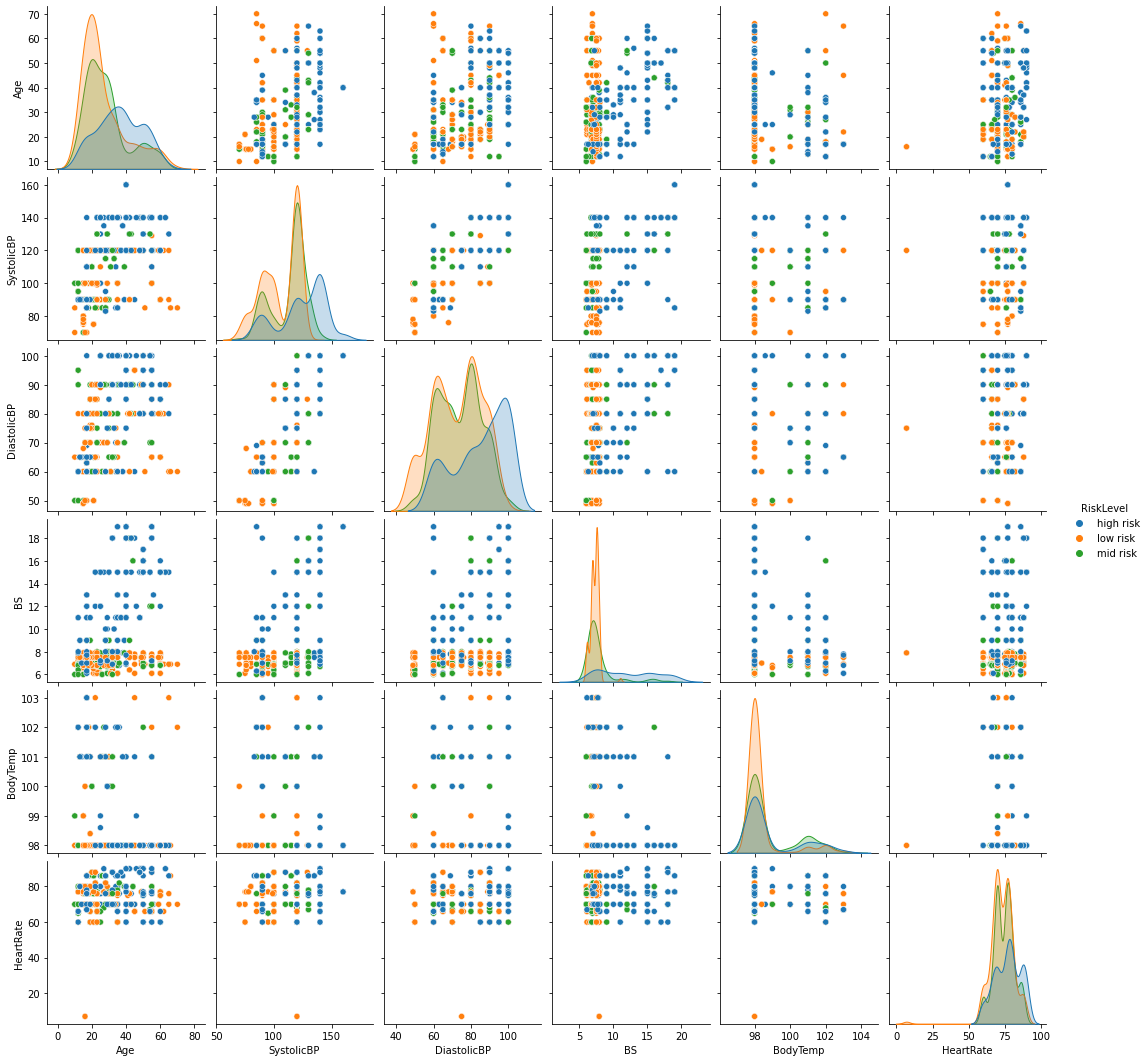

In [7]:
import seaborn as sns
sns.pairplot(MRdataset, vars=['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp','HeartRate'], hue="RiskLevel")
#This pairplot compares the attributes
#It also shows each attributes relation with the class variables.

<AxesSubplot:>

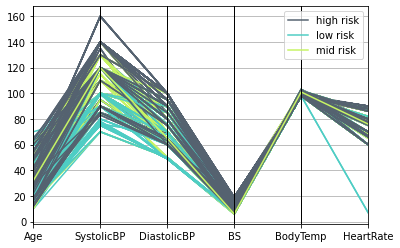

In [8]:
pd.plotting.parallel_coordinates(
MRdataset, 'RiskLevel', color=('#556270', '#4ECDC4', '#C7F464') )
#I plotted this graph for a different visulation of each attributes relation with the class varibale. 
#However as there are many datapoints this is not the most informative plot. 

In [9]:
MRdataset.corr()
#This is a correlation matrix, another way of comparing the attributes

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000


<AxesSubplot:>

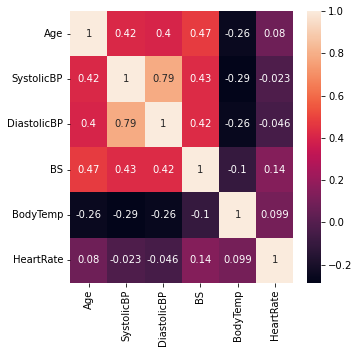

In [10]:
corr = MRdataset.corr()
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True, ax = ax)
#This is visulisation of the above confusion matrix.
#This clearly shows BodyTemp has little to no correlation with all of the attributes. 
#However i have decided to not remove this attribute as the relation with the class variable is what matters. 
#Also there are only 6 attributes so there should not be too much noise that will affect the model. 

## Pre-processing 

### Label encoder

The class variable in this dataset is nominal and needs to be transformed into numeric values. Therefore a label encoder is used to change each of the 3 class values to numerical values.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

MRdataset['RiskLevel'] = le.fit_transform(MRdataset['RiskLevel'])
MRdataset.tail()

#changing nominal values to numeric
#high risk = 0
#mid risk =1
#low risk =2

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,0
1010,55,120,90,18.0,98.0,60,0
1011,35,85,60,19.0,98.0,86,0
1012,43,120,90,18.0,98.0,70,0
1013,32,120,65,6.0,101.0,76,2


### Splitting training/testing data

This next stage in the data preprocessing is crucial for preparing the data to be used in the model building. The data is split into training and testing datasets.

In [12]:
from sklearn.model_selection import train_test_split #importing library
X = MRdataset.drop(['RiskLevel'], axis=1) #remove class column
y = MRdataset['RiskLevel'] #creating dataset of just class value

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3,random_state=0)  #splitting the dataset into training and testing with 30% holdout

print(y_train)

993    0
406    2
643    2
258    1
644    0
      ..
835    2
192    0
629    1
559    1
684    0
Name: RiskLevel, Length: 709, dtype: int64


In [13]:
Accuracy_list = [] #producing a list with accuracy values of each of the model for comparison chart later.

## Experiments 
## Model training

This stage of the machine learning pipeline is building the classification models and evaluating their performance through evaluation metrices. 

### Logistic regression- classification model

In [14]:
#important required libraries. 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

#build logisticregressor
lr=LogisticRegression(solver='lbfgs', max_iter=8000)

#train and predict
lr.fit(X_train,y_train) 
y_pred=lr.predict(X_test) 
y_conf=lr.predict_proba(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test,y_pred)) #printing the accuracy of this model
print(metrics.classification_report(y_test,y_pred, digits=3)) 
#printing a evaluation metrices which computes the precision and recall values aswell as the f1 score. 

Accuracy:  0.6098360655737705
              precision    recall  f1-score   support

           0      0.747     0.711     0.728        83
           1      0.616     0.756     0.679       119
           2      0.463     0.359     0.404       103

    accuracy                          0.610       305
   macro avg      0.609     0.609     0.604       305
weighted avg      0.600     0.610     0.600       305



In [15]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
#use only confidence for target class to calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1) 
#print(fpr)
#print(tpr)
#print(thresholds)
auc_score = roc_auc_score(y_test, y_conf, multi_class = "ovr") 
print("Auc Score: ", auc_score)

Auc Score:  0.7940921854642259


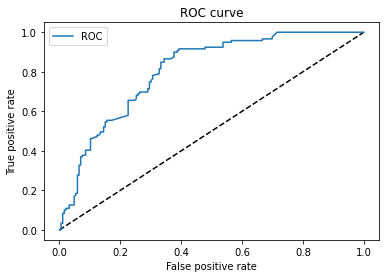

In [16]:
from matplotlib import pyplot as plt 
#plotting roc curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--') #plot size
plt.plot(fpr, tpr, label='ROC') 
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
plt.title('ROC curve') 
plt.legend(loc='best')
# plt.show()

In [17]:
lr_acc = lr.score(X_test, y_test)
Accuracy_list.append(lr_acc * 100)
#adding accuracy score of this model to accuracy list

## Knn algorithm

In [18]:
from sklearn import neighbors, datasets 
from sklearn.metrics import accuracy_score
#Next algorithm.
#uses for look to test different weight values. 
#first k value set as 3. 

n_neighbors=3
for weights in ["uniform", "distance"]:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights) 
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(f'the accuracy_score before Normalisation:{accuracy_score(y_test, y_pred)}')
    
print(metrics.classification_report(y_test,y_pred, digits=3))

the accuracy_score before Normalisation:0.7049180327868853
the accuracy_score before Normalisation:0.7770491803278688
              precision    recall  f1-score   support

           0      0.821     0.771     0.795        83
           1      0.780     0.807     0.793       119
           2      0.740     0.748     0.744       103

    accuracy                          0.777       305
   macro avg      0.780     0.775     0.777       305
weighted avg      0.778     0.777     0.777       305



In [19]:
# Pre-processing of data
from sklearn.preprocessing import MinMaxScaler 
#normalisation was applied to this model to see if it improves model accuracy.
#it improves the accuracy score of the model with distance weight by ~ 2%.
scaler = MinMaxScaler() #using minmaxscaler from sklearn
scaler.fit(X)
X_Norm=scaler.transform(X)
X_Norm_train, X_Norm_test, y_train, y_test = train_test_split(X_Norm, y, test_size=0.3, random_state=0) 
n_neighbors=3
for weights in ["uniform", "distance"]:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights) 
    clf.fit(X_Norm_train, y_train)
    y_pred=clf.predict(X_Norm_test)
    print(f'the accuracy Score after Normalisation:{accuracy_score(y_test, y_pred)}')
print(metrics.classification_report(y_test,y_pred, digits=3))

the accuracy Score after Normalisation:0.7016393442622951
the accuracy Score after Normalisation:0.7934426229508197
              precision    recall  f1-score   support

           0      0.846     0.795     0.820        83
           1      0.792     0.832     0.811       119
           2      0.755     0.748     0.751       103

    accuracy                          0.793       305
   macro avg      0.798     0.792     0.794       305
weighted avg      0.794     0.793     0.793       305



In [20]:
#Distance weight works better.
#now lets try to fine tune with this paramter and diff k values.not much diff in performance
n_neighbors=10
scaler = MinMaxScaler()
scaler.fit(X)
X_Norm=scaler.transform(X)
X_Norm_train, X_Norm_test, y_train, y_test = train_test_split(X_Norm, y, test_size=0.3, random_state=0) 

clf = neighbors.KNeighborsClassifier(n_neighbors, weights="distance") 
clf.fit(X_Norm_train, y_train)
clf_pred=clf.predict(X_Norm_test)
print(f'the accuracy Score after Normalisation:{accuracy_score(y_test, clf_pred)}')
print(metrics.classification_report(y_test,clf_pred, digits=3))

the accuracy Score after Normalisation:0.8
              precision    recall  f1-score   support

           0      0.848     0.807     0.827        83
           1      0.800     0.840     0.820       119
           2      0.762     0.748     0.755       103

    accuracy                          0.800       305
   macro avg      0.803     0.798     0.801       305
weighted avg      0.800     0.800     0.800       305



Auc Score:  0.6481039275935506


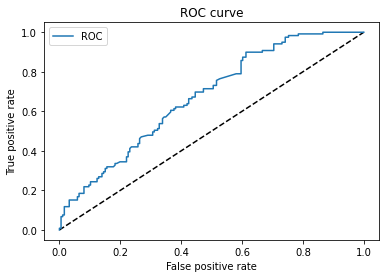

In [21]:
y_conf=clf.predict_proba(X_test)

from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
#use only confidence for target class to calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1) 
#print(fpr)
#print(tpr)
#print(thresholds)
auc_score = roc_auc_score(y_test, y_conf, multi_class = "ovr") 
print("Auc Score: ", auc_score)

#plotting roc curve for optimized knn model
from matplotlib import pyplot as plt 
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fpr, tpr, label='ROC') 
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
plt.title('ROC curve') 
plt.legend(loc='best')
#plt.grid(b=None)
# plt.show()

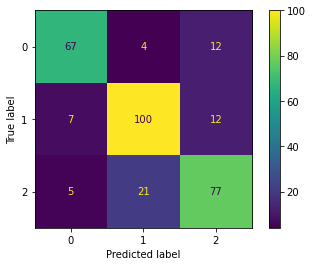

In [22]:
from sklearn.metrics import plot_confusion_matrix
#visualisation of confusion matrix. 

plot_confusion_matrix(clf, X_Norm_test, y_test)

In [23]:
knn_acc = accuracy_score(y_test, clf_pred)
Accuracy_list.append(knn_acc * 100)
#adding the accuracy score to my list for comparison later.

## Desicion tree classifier

Accuracy Score: 0.6557377049180327
              precision    recall  f1-score   support

           0      0.838     0.807     0.822        83
           1      0.691     0.546     0.610       119
           2      0.519     0.660     0.581       103

    accuracy                          0.656       305
   macro avg      0.683     0.671     0.671       305
weighted avg      0.673     0.656     0.658       305

[[66  5 12]
 [ 7 99 13]
 [ 5 21 77]]


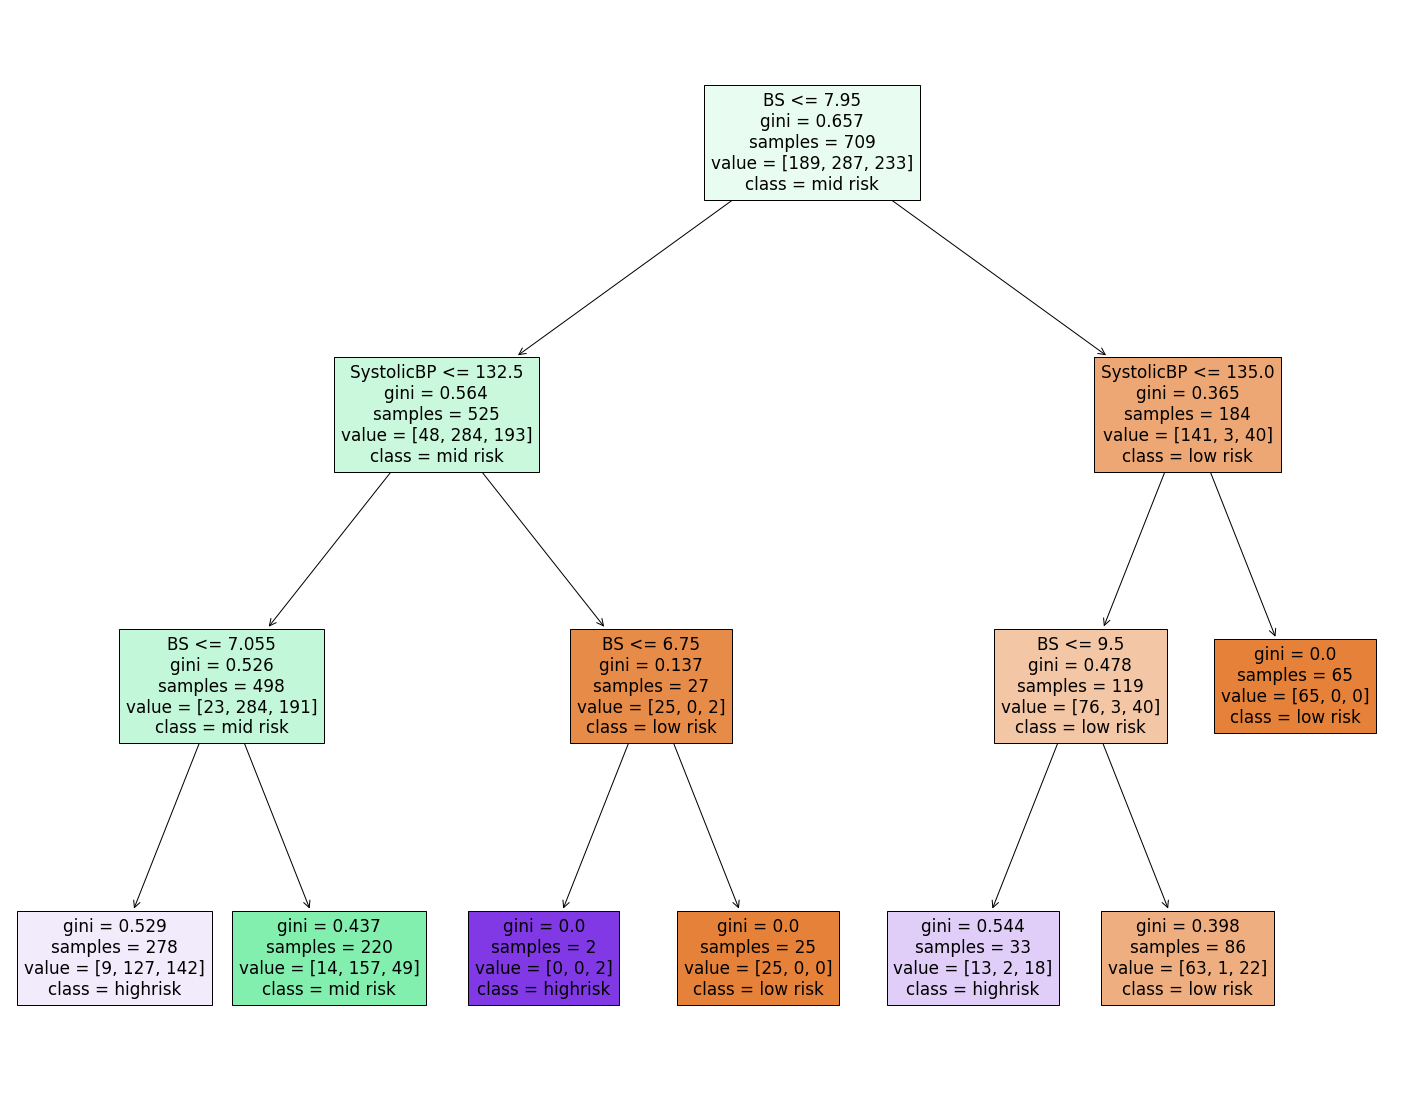

In [24]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import math
from sklearn import metrics
from sklearn.tree import export_text

#normalisation makes no difference
model = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=3, min_samples_leaf=2) 
model.fit(X_train,y_train)

#prediction
model_pred = model.predict(X_test)#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test,model_pred))
print(metrics.classification_report(y_test,model_pred, digits=3))

#plotting figure
fig = plt.figure(figsize=(25,20)) 
_ = tree.plot_tree(model,
feature_names=['Age','SystolicBP','DiastolicBP','BS', 'BodyTemp', 'HeartRate'], class_names=['low risk', 'mid risk', 'highrisk'],
filled=True)

#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

In [25]:
#changing paramters of decision tree to default- improves accuracy by over 25%

model = DecisionTreeClassifier() 
model.fit(X_train,y_train)

#prediction
model_pred = model.predict(X_test)
#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test,model_pred))
print('F1 Score:', metrics.f1_score(y_test, model_pred, average='micro'))
print('Precision Score: ',metrics.precision_score(y_test,model_pred, average='micro'))
print(metrics.classification_report(y_test,model_pred, digits=3))
text_representation = tree.export_text(model)
print(text_representation)


Accuracy Score: 0.7836065573770492
F1 Score: 0.7836065573770492
Precision Score:  0.7836065573770492
              precision    recall  f1-score   support

           0      0.802     0.831     0.817        83
           1      0.816     0.782     0.798       119
           2      0.733     0.748     0.740       103

    accuracy                          0.784       305
   macro avg      0.784     0.787     0.785       305
weighted avg      0.784     0.784     0.784       305

|--- feature_3 <= 7.95
|   |--- feature_1 <= 132.50
|   |   |--- feature_3 <= 7.06
|   |   |   |--- feature_0 <= 15.50
|   |   |   |   |--- feature_0 <= 14.50
|   |   |   |   |   |--- feature_1 <= 97.50
|   |   |   |   |   |   |--- feature_3 <= 6.95
|   |   |   |   |   |   |   |--- feature_5 <= 67.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 6.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_3 >  6.50
|   |   |   |   |   |   |   |   |   |--- class: 2
|   | 

Auc Score:  0.885745018709784


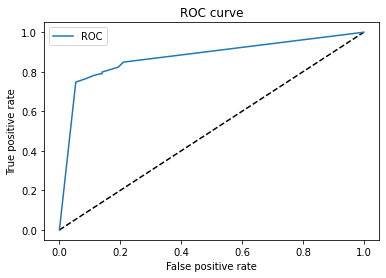

In [26]:
y_conf=model.predict_proba(X_test)

from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
#use only confidence for target class to calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1) 
#print(fpr)
#print(tpr)
#print(thresholds)
auc_score = roc_auc_score(y_test, y_conf, multi_class = "ovr") 
print("Auc Score: ", auc_score)
from matplotlib import pyplot as plt 
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fpr, tpr, label='ROC') 
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
plt.title('ROC curve') 
plt.legend(loc='best')
# plt.show()

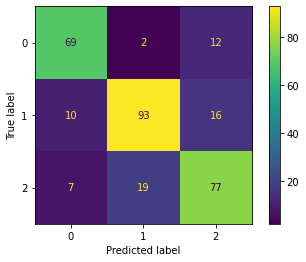

In [27]:
plot_confusion_matrix(model, X_test, y_test)

In [28]:
dt_acc = metrics.accuracy_score(y_test,model_pred)
Accuracy_list.append(knn_acc * 100)
#adding the accuracy score to my list for comparison later.

### SVM classifier

In [29]:
from sklearn.svm import SVC
#Create the SVM model
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data
classifier.fit(X_train, y_train)

print("Train accuracy:",classifier.score(X_train,y_train))
print("Test accuracy:",classifier.score(X_test,y_test))

#Make the prediction
svm_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(f'Accuracy:',accuracy_score(y_test, svm_pred)* 100 ,'%')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(metrics.classification_report(y_test,svm_pred, digits=3))

Train accuracy: 0.6629055007052186
Test accuracy: 0.6327868852459017
CM: [[66  5 12]
 [ 7 99 13]
 [ 5 21 77]]
Accuracy: 63.278688524590166 %
Standard Deviation: 4.90 %
              precision    recall  f1-score   support

           0      0.781     0.687     0.731        83
           1      0.615     0.807     0.698       119
           2      0.526     0.388     0.447       103

    accuracy                          0.633       305
   macro avg      0.641     0.627     0.625       305
weighted avg      0.630     0.633     0.622       305



In [30]:
#normalisation makes no diff.
#Create the SVM model
classifier2 = SVC(kernel = 'poly', random_state = 0, probability=True)


#gamma=0.10, C=1.0 - these are parameters that i attempted to change 
#in this classifier but my kernel kept crashing.


#Fit the model for the data
classifier2.fit(X_train, y_train)
#Make the prediction
y_pred2 = classifier2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(f'CM:',cm)

#evaluation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(f'Accuracy:',accuracy_score(y_test, y_pred2)* 100 ,'%')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(metrics.classification_report(y_test,y_pred2, digits=3))

CM: [[66  5 12]
 [ 7 99 13]
 [ 5 21 77]]
Accuracy: 64.59016393442623 %
Standard Deviation: 4.90 %
              precision    recall  f1-score   support

           0      0.817     0.699     0.753        83
           1      0.599     0.891     0.716       119
           2      0.579     0.320     0.412       103

    accuracy                          0.646       305
   macro avg      0.665     0.637     0.627       305
weighted avg      0.651     0.646     0.624       305



Auc Score:  0.7950498379697573


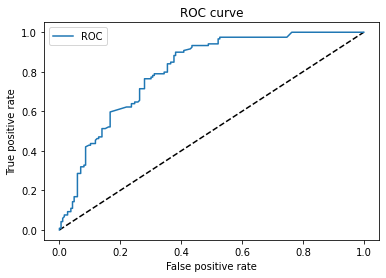

In [31]:
y_conf=classifier2.predict_proba(X_test)

from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score
#use only confidence for target class to calculate ROC
fpr, tpr, thresholds = roc_curve(y_test, y_conf[:,1], pos_label=1) 
#print(fpr)
#print(tpr)
#print(thresholds)
auc_score = roc_auc_score(y_test, y_conf, multi_class = "ovr") 
print("Auc Score: ", auc_score)

#plotting figure
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--') 
plt.plot(fpr, tpr, label='ROC') 
plt.xlabel('False positive rate') 
plt.ylabel('True positive rate') 
plt.title('ROC curve') 
plt.legend(loc='best')
#plt.show()

In [32]:
#Create the SVM model
classifier = SVC(kernel = 'rbf', random_state = 0)
#Fit the model for the data
classifier.fit(X_train, y_train)
#Make the prediction
y_pred3 = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred3)
print(f'CM:',cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print(f'Accuracy:',accuracy_score(y_test, y_pred3)* 100 ,'%')
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(metrics.classification_report(y_test,y_pred3, digits=3))

CM: [[ 45  27  11]
 [  1 106  12]
 [  5  71  27]]
Accuracy: 58.36065573770492 %
Standard Deviation: 6.34 %
              precision    recall  f1-score   support

           0      0.882     0.542     0.672        83
           1      0.520     0.891     0.656       119
           2      0.540     0.262     0.353       103

    accuracy                          0.584       305
   macro avg      0.647     0.565     0.560       305
weighted avg      0.625     0.584     0.558       305



In [33]:
svm_acc = accuracy_score(y_test, y_pred2)
Accuracy_list.append(svm_acc * 100)
#adding the accuracy score to my list for comparison later.

In [34]:
print(Accuracy_list)

[60.983606557377044, 80.0, 80.0, 64.59016393442623]


In [35]:
#setting labels for the models.
model_list = ["LogisticRegression", "Knn", "DecisionTree","SVM"]

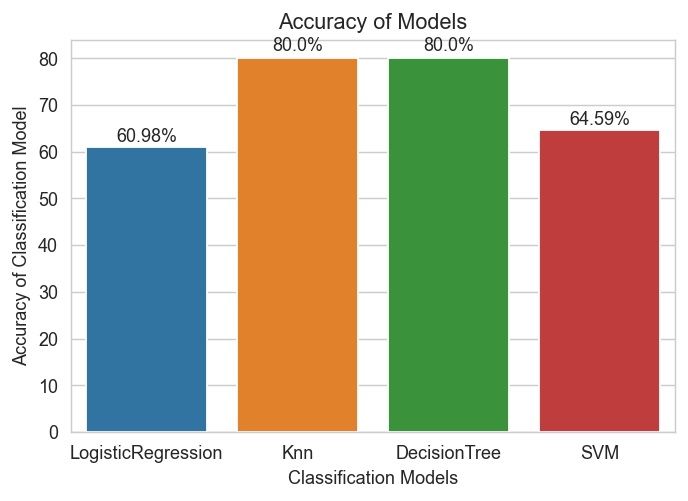

In [36]:
#plotting graph to compare the accuracy scores for the different models evaluated in this task.
sns.set_style("whitegrid")
sns.color_palette("rocket")
plt.figure(figsize=(6,4), dpi=130)
ax = sns.barplot(x=model_list, y=Accuracy_list)
plt.title("Accuracy of Models")
plt.xlabel('Classification Models')
plt.ylabel("Accuracy of Classification Model")
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center')
plt.show()